In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/CSCI_567/Project"

ls: cannot access '/content/drive/MyDrive/CSCI_567/Project': No such file or directory


In [ ]:
root =  "/content/drive/MyDrive/CSCI_567/Project"

In [ ]:
df = pd.read_csv(root + "/application_metadata.csv")

In [ ]:
df

,doc-id,examiner_experience,examiner_allowance_ratio,class_saturation,subclass_saturation,customer_experience,customer_success_ratio,status
0,2682096,0,0.000000,0,0,0,0.000000,ISS
1,2618355,0,0.000000,0,0,0,0.000000,ISS
2,3011650,0,0.000000,0,0,0,0.000000,ISS
3,3237574,0,0.000000,0,0,0,0.000000,ISS
4,3429712,0,0.000000,1,0,0,0.000000,ISS
...,...,...,...,...,...,...,...,...
4916075,90013421,277,0.649819,43125,6594,277,0.649819,PEND
4916076,90013419,682,0.882698,55032,5535,682,0.882698,PEND
4916077,90013408,529,0.780718,119827,13373,529,0.780718,PEND
4916078,14398284,6133,0.043209,120770,11506,6133,0.043209,PEND


In [ ]:
df = df[~df['status'].str.contains('PEND', case=False)]
df = df.reset_index(drop=True)

In [ ]:
df.describe()

,doc-id,examiner_experience,examiner_allowance_ratio,class_saturation,subclass_saturation,customer_experience,customer_success_ratio
count,4.117285e+06,4.117285e+06,4.117285e+06,4.117285e+06,4.117285e+06,4.117285e+06,4.117285e+06
mean,1.234501e+07,5.029763e+02,7.643155e-01,1.675307e+04,2.954730e+03,5.029763e+02,7.643155e-01
std,5.607356e+06,1.320641e+03,2.228962e-01,2.099201e+04,3.829545e+03,1.320641e+03,2.228962e-01
min,2.618355e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.010214e+07,1.030000e+02,6.315789e-01,2.936000e+03,4.590000e+02,1.030000e+02,6.315789e-01
50%,1.140475e+07,2.630000e+02,8.390142e-01,8.520000e+03,1.750000e+03,2.630000e+02,8.390142e-01
75%,1.262732e+07,5.720000e+02,9.437908e-01,2.127600e+04,4.032000e+03,5.720000e+02,9.437908e-01
max,9.603000e+07,2.694000e+04,1.000000e+00,1.255260e+05,3.846600e+04,2.694000e+04,1.000000e+00


In [ ]:
#Data seems to be skewed by earlier results. Taking only last ~1,000,000 --> ?
df = df[3000000:]

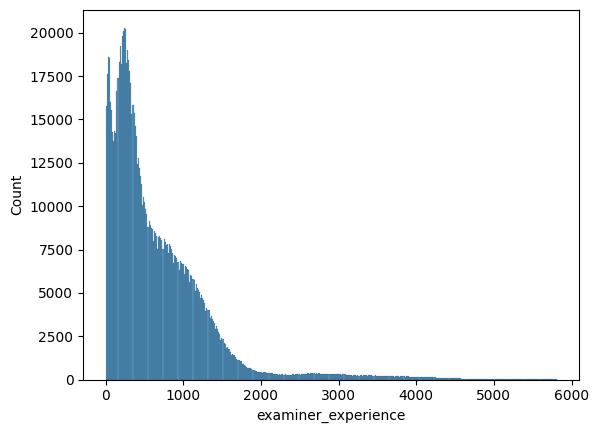

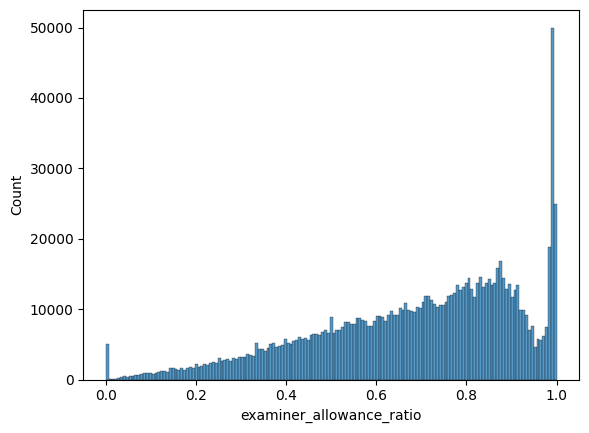

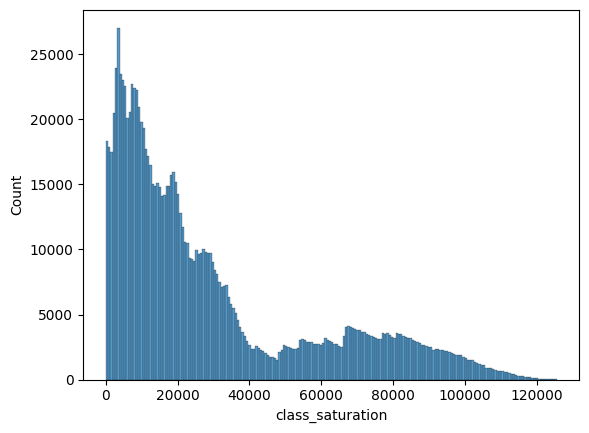

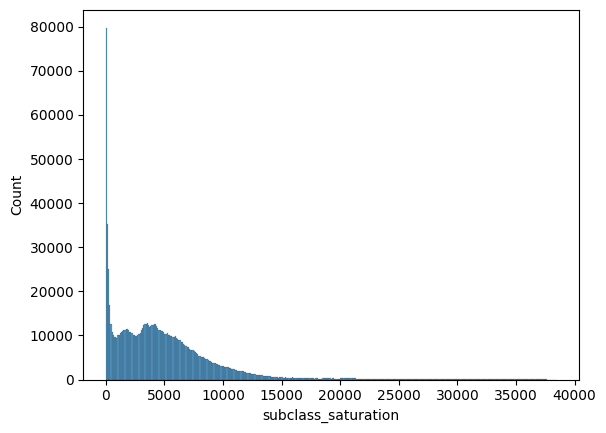

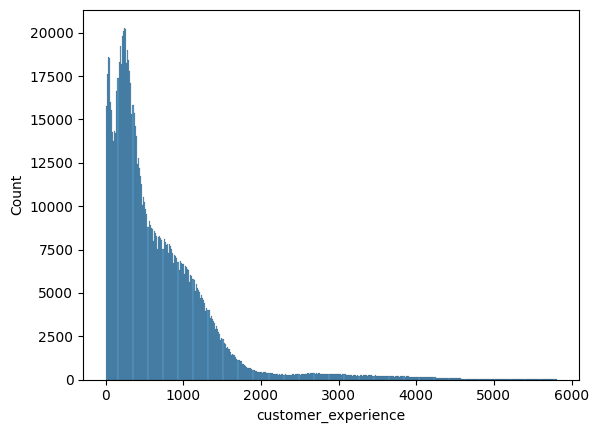

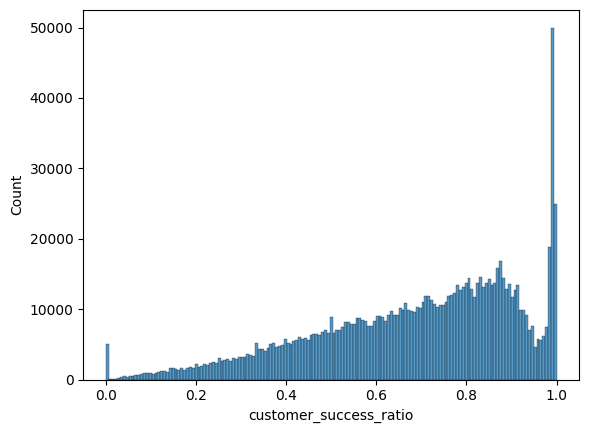

In [ ]:
#Plotting distributions for relevant features
for feature in ['examiner_experience', 'examiner_allowance_ratio',
                'class_saturation', 'subclass_saturation',
                'customer_experience', 'customer_success_ratio']:
  sns.histplot(df[feature])
  plt.show()

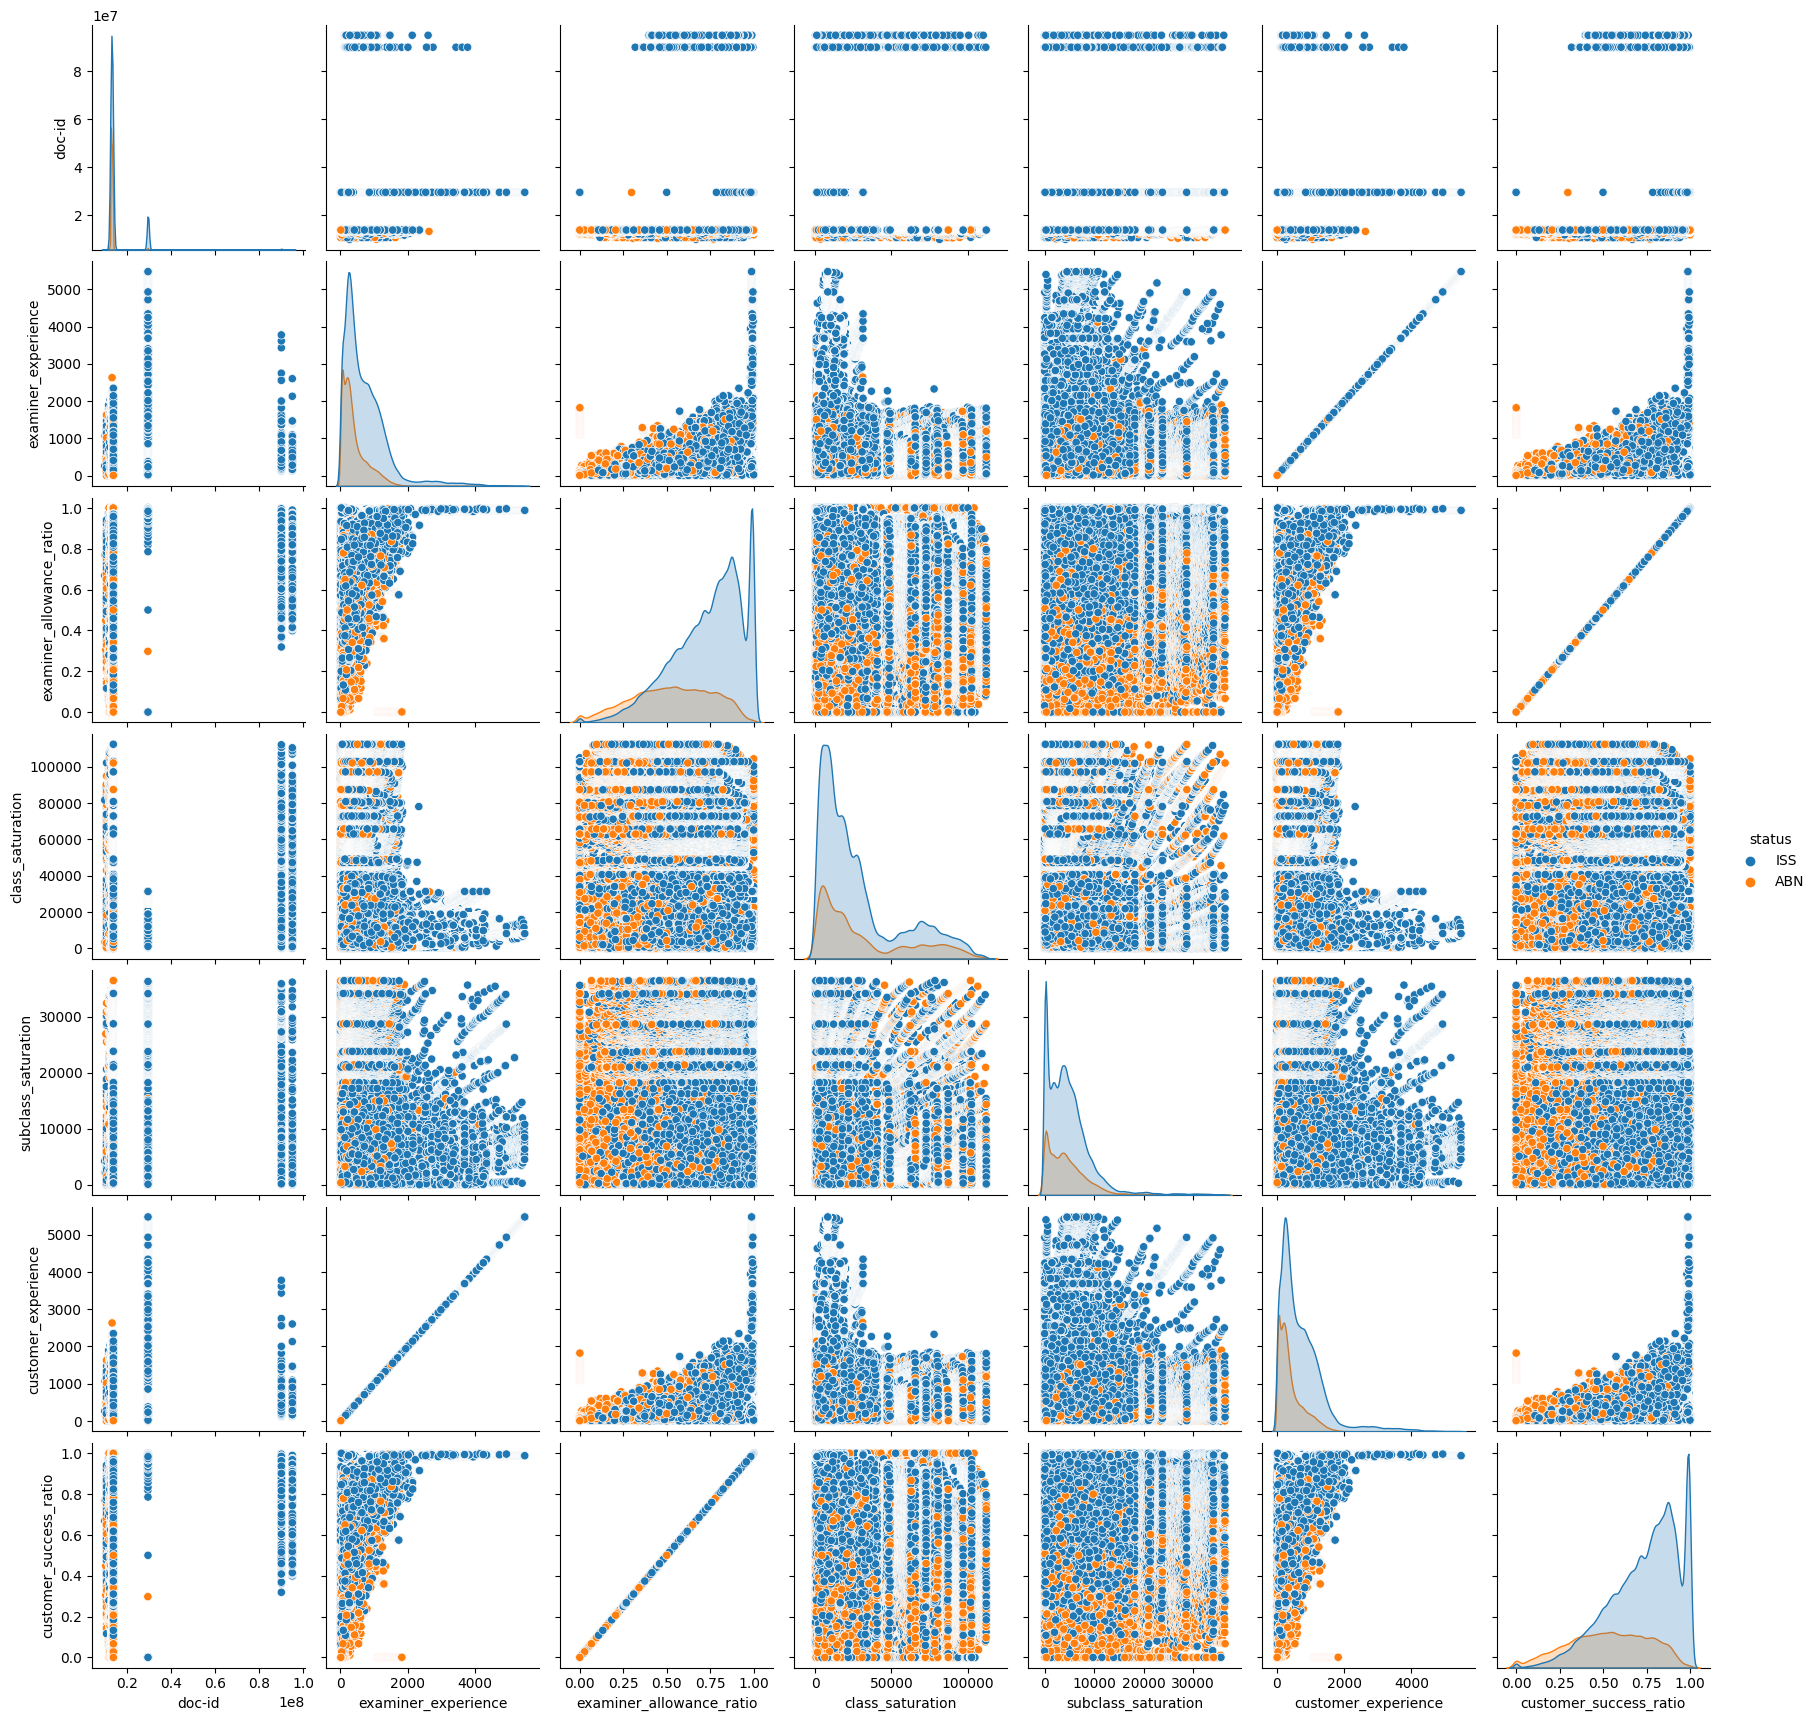

In [ ]:
# pairplot for the last 100,000 samples
sns.pairplot(df[:-100000], hue="status")

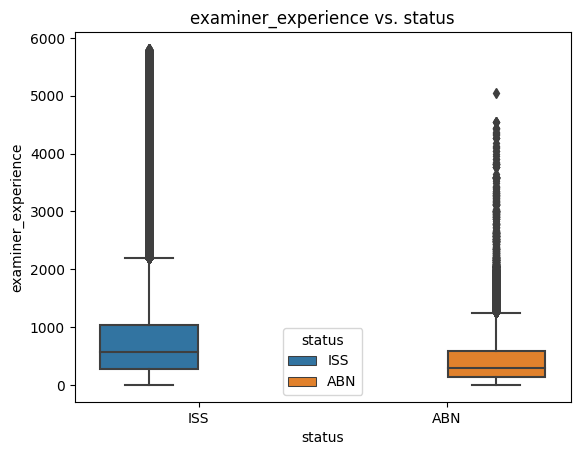

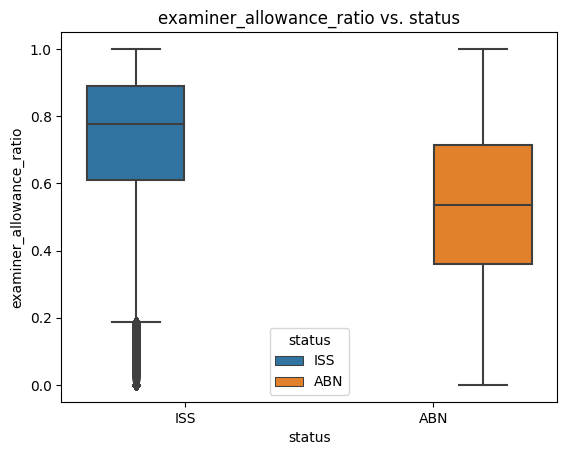

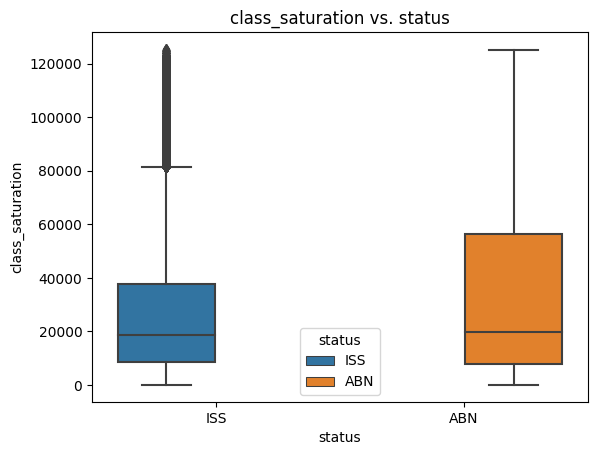

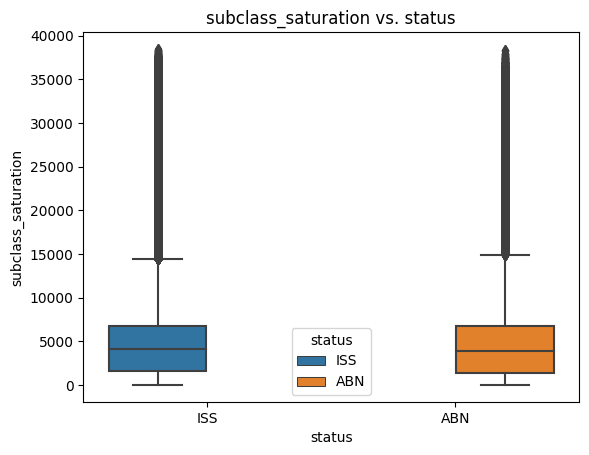

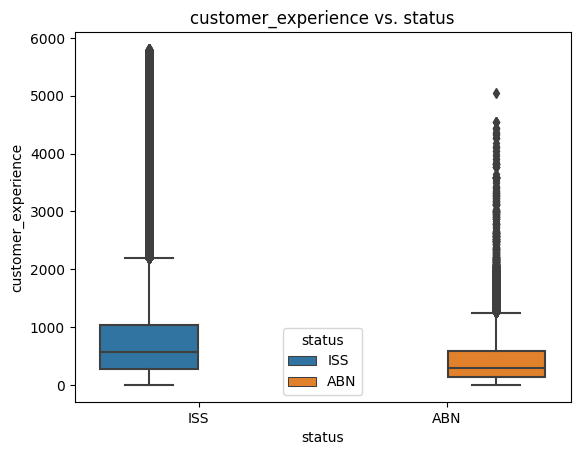

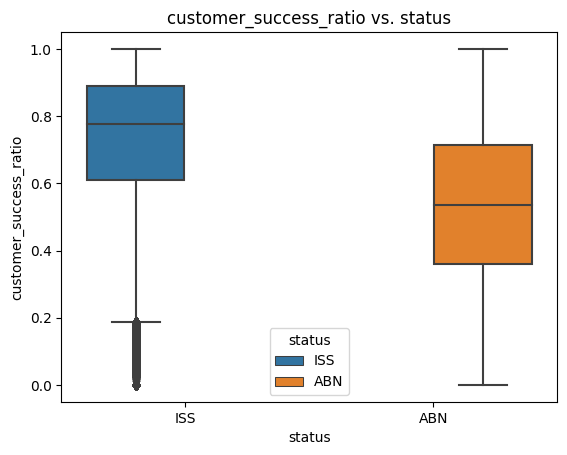

In [ ]:
for feature in ['examiner_experience', 'examiner_allowance_ratio',
                'class_saturation', 'subclass_saturation',
                'customer_experience', 'customer_success_ratio']:
  sns.boxplot(x='status', y=feature, data=df, hue="status").set_title(feature +' vs. status')
  plt.show()


### Boxplot outliers

In [ ]:
# Function to detect outliers for a given feature and class
def detect_outliers(df, feature, class_name):
    class_df = df[df['status'] == class_name]
    Q1 = class_df[feature].quantile(0.25)
    Q3 = class_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = class_df[(class_df[feature] < lower_bound) | (class_df[feature] > upper_bound)]
    return outliers

# Detect outliers for each feature in both classes
outliers_dict = {}
for feature in df.columns[1:-1]:
    for class_name in df['status'].unique():
        outliers = detect_outliers(df, feature, class_name)
        outliers_dict[(feature, class_name)] = outliers


In [ ]:
# count number of total outliers
total_outliers = 0
for key, value in outliers_dict.items():
    print(key, len(value))
    total_outliers += len(value)

print(f'Total outliers: {total_outliers}')

('examiner_experience', 'ISS') 41783
('examiner_experience', 'ABN') 11560
('examiner_allowance_ratio', 'ISS') 8133
('examiner_allowance_ratio', 'ABN') 0
('class_saturation', 'ISS') 65802
('class_saturation', 'ABN') 0
('subclass_saturation', 'ISS') 30794
('subclass_saturation', 'ABN') 11921
('customer_experience', 'ISS') 41783
('customer_experience', 'ABN') 11560
('customer_success_ratio', 'ISS') 8133
('customer_success_ratio', 'ABN') 0
Total outliers: 231469


In [ ]:
total_outliers/len(df)

0.20717095459081614

# There are much more sophisticted techniques for outlier detection, but this isn't relevant for our problem due to the variable of patents accepted. Notice there are much more outliers in the issued column.

In [ ]:
matrix = df.corr()
matrix

In [ ]:
plt.figure(figsize=(36,36), dpi = 480)
sns.heatmap(matrix, annot=True)
plt.show()